# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
 # Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import json
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
# Read the csv files contains more than 40,000 cities
city_csv = "worldcities.csv"
read_city = pd.read_csv(city_csv)
# create a city list to store city names
city_list = read_city["city_ascii"]
# randomly choose more than 500 cities, to avoid repeated selection of city
# select 650 cities and use unique function to drop repeated cities
random_city = city_list.sample(n=650)
unique_random_city = random_city.unique()
# check how many unique cities are selected and print the city list
print(len(unique_random_city))
unique_random_city

644


array(['Edmundston', 'Ramon Magsaysay', 'Az Zabadani', 'Fortuna',
       'Saint-Alban', 'Ujszasz', 'Linton Hall', 'Ayvacik', 'Itajobi',
       'Campomorone', 'El Paisnal', 'Kamwenge', 'Zubia', 'Piastow',
       'Bastrop', 'Shuangxianxiang', 'Rafha', 'Heppenheim',
       'Cape Canaveral', 'Crowley', 'Langueux', 'Silver Springs',
       'North Tustin', 'Lekala', 'Ishimbay', 'Trebisacce', 'Morelia',
       'Smithers', 'Qinbaling', 'Farroupilha', 'Berlin', 'Longba',
       'Appley Bridge', 'Zurrieq', 'Tyumen', 'San Agustin Acasaguastlan',
       'Cartago', 'Giporlos', 'Wilmington Manor', 'Kralupy nad Vltavou',
       'Shiliguri', 'Pollenza', 'Kandern', 'Arden Hills', 'Hewlett',
       'Topola', 'Simi Valley', 'San Juan', 'Boscoreale', 'Ambanja',
       'Dnestrovsc', 'Urumita', 'Puquio', 'Ingeniero Guillermo N. Juarez',
       'Haapajarvi', 'Zarrin Shahr', 'Los Alcazares', 'Bahia Blanca',
       'Guapo', 'Hardenberg', 'Pinabacdao', 'New Sewickley', 'Lafia',
       'Bury', 'East Massapequa',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create the base url 
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

# create empty list to hold data for later analysis
cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# use i and j to count cities for data retrieval
i = 1
j = 1
print("Beginning Data Retrieval")     
print("-----------------------------")
for city in unique_random_city:
    # query for weather data based on city name
    query_url = f"{base_url}&q={city}"
    # get response as json
    response = requests.get(query_url).json()
    try: 
        # adding the data into each list
        cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        # print the log
        print(f"Processing Record {i} of set {j} | {response['name']}")
        # 50 data as one set
        if i < 50:
            i = i+1
        else:
            j = j+1
            i = 1
    except:
        print("City not found. Skipping...")
        pass
        
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | Edmundston
Processing Record 2 of set 1 | Ramon Magsaysay
Processing Record 3 of set 1 | Az Zabadānī
Processing Record 4 of set 1 | Fortuna
Processing Record 5 of set 1 | Saint-Alban
Processing Record 6 of set 1 | Újszász
Processing Record 7 of set 1 | Linton Hall
Processing Record 8 of set 1 | Ayvacık
Processing Record 9 of set 1 | Itajobi
Processing Record 10 of set 1 | Campomorone
Processing Record 11 of set 1 | El Paisnal
Processing Record 12 of set 1 | Kamwenge
Processing Record 13 of set 1 | Zubia
Processing Record 14 of set 1 | Piastów
Processing Record 15 of set 1 | Bastrop
City not found. Skipping...
Processing Record 16 of set 1 | Rafha
Processing Record 17 of set 1 | Heppenheim
Processing Record 18 of set 1 | Cape Canaveral
Processing Record 19 of set 1 | Crowley
Processing Record 20 of set 1 | Langueux
Processing Record 21 of set 1 | Silver Springs
Processing Record 22 of set 1 | North Tus

Processing Record 34 of set 4 | Gemeente Druten
Processing Record 35 of set 4 | Concord
Processing Record 36 of set 4 | Barabash
Processing Record 37 of set 4 | Litzendorf
Processing Record 38 of set 4 | Carmo da Cachoeira
Processing Record 39 of set 4 | Orsett
Processing Record 40 of set 4 | Selma
Processing Record 41 of set 4 | Twinsburg
Processing Record 42 of set 4 | Flat Rock
Processing Record 43 of set 4 | Vecpiebalga
Processing Record 44 of set 4 | Stornarella
Processing Record 45 of set 4 | Dickson
Processing Record 46 of set 4 | Beya
Processing Record 47 of set 4 | Columbia
Processing Record 48 of set 4 | Mono
Processing Record 49 of set 4 | Renwick
Processing Record 50 of set 4 | Palm Beach
Processing Record 1 of set 5 | Utley
Processing Record 2 of set 5 | Titusville
Processing Record 3 of set 5 | Maracaí
Processing Record 4 of set 5 | Preveza
Processing Record 5 of set 5 | Alagoa Grande
Processing Record 6 of set 5 | Ingá
Processing Record 7 of set 5 | Zhukovka
Processing R

Processing Record 14 of set 8 | Cacoal
Processing Record 15 of set 8 | Mios
Processing Record 16 of set 8 | Orono
Processing Record 17 of set 8 | Ascea
City not found. Skipping...
Processing Record 18 of set 8 | San Fernando
Processing Record 19 of set 8 | Palatka
Processing Record 20 of set 8 | Delfinópolis
Processing Record 21 of set 8 | Sabon Birni
Processing Record 22 of set 8 | Dalmine
Processing Record 23 of set 8 | Kahaluu-Keauhou
Processing Record 24 of set 8 | La Ferté-Macé
City not found. Skipping...
Processing Record 25 of set 8 | Hulyaypole
Processing Record 26 of set 8 | Careaçu
Processing Record 27 of set 8 | Sint-Martens-Lennik
Processing Record 28 of set 8 | Rivolta d'Adda
Processing Record 29 of set 8 | Longyan
Processing Record 30 of set 8 | Holešov
Processing Record 31 of set 8 | Macon
Processing Record 32 of set 8 | Pilar
Processing Record 33 of set 8 | Lagonglong
Processing Record 34 of set 8 | Springfield
Processing Record 35 of set 8 | Brugine
Processing Record 3

Processing Record 46 of set 11 | Rome
Processing Record 47 of set 11 | San Gimignano
Processing Record 48 of set 11 | Castelli
Processing Record 49 of set 11 | Bandio
Processing Record 50 of set 11 | Khrestivka
Processing Record 1 of set 12 | Nyack
Processing Record 2 of set 12 | Warsaw
Processing Record 3 of set 12 | Plainsboro
Processing Record 4 of set 12 | Jiaxing
Processing Record 5 of set 12 | Galliera
Processing Record 6 of set 12 | Luanda
Processing Record 7 of set 12 | Stafford
Processing Record 8 of set 12 | Kulti
Processing Record 9 of set 12 | Obernai
Processing Record 10 of set 12 | Chu
Processing Record 11 of set 12 | Sabino
Processing Record 12 of set 12 | Standerton
Processing Record 13 of set 12 | Lusambo
Processing Record 14 of set 12 | Santa Maria di Sala
Processing Record 15 of set 12 | Stakhanov
Processing Record 16 of set 12 | Floirac
Processing Record 17 of set 12 | Gifford
Processing Record 18 of set 12 | Zarat
Processing Record 19 of set 12 | Canandaigua
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# put data lists into dictionary and create a dataframe
city_weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_weather_df = pd.DataFrame(city_weather_dict)
city_weather_df.head()
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edmundston,47.3737,-68.3251,51.13,83,56,8.66,CA,1631358598
1,Ramon Magsaysay,8.0019,123.5094,75.15,92,92,3.13,PH,1631358618
2,Az Zabadānī,33.7249,36.1005,81.21,32,0,10.36,SY,1631358619
3,Fortuna,40.5982,-124.1573,52.72,75,75,0.00,US,1631358620
4,Saint-Alban,43.7000,1.4167,77.09,64,20,3.44,FR,1631358620
...,...,...,...,...,...,...,...,...,...
592,Wildeshausen,52.9000,8.4333,68.11,88,56,13.38,DE,1631359066
593,Estaires,50.6457,2.7278,69.89,78,100,13.42,FR,1631359067
594,Saguday,16.5428,121.5638,75.18,96,100,2.84,PH,1631359067
595,Gulu,2.7746,32.2990,79.50,60,38,2.19,UG,1631359068


In [5]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,30.344350,-5.550832,72.249832,67.839196,49.159129,5.600385,1.631359e+09
std,24.296815,66.648207,10.318883,22.566626,39.991230,3.964832,1.441102e+02
min,-43.533300,-155.961700,42.890000,8.000000,0.000000,0.000000,1.631358e+09
25%,16.675500,-71.209200,66.450000,54.000000,1.000000,2.930000,1.631359e+09
50%,40.132100,5.150000,72.860000,73.000000,45.000000,4.970000,1.631359e+09
75%,47.300000,23.666700,79.750000,86.000000,93.000000,8.010000,1.631359e+09
max,63.900000,173.833300,106.900000,100.000000,100.000000,24.250000,1.631359e+09


In [6]:
city_weather_df.to_csv("../output_data/city_weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_100 = city_weather_df.loc[city_weather_df["Humidity"] >= 100]
drop_humidity_list = humidity_100.index.to_list()

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(index=drop_humidity_list, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edmundston,47.3737,-68.3251,51.13,83,56,8.66,CA,1631358598
1,Ramon Magsaysay,8.0019,123.5094,75.15,92,92,3.13,PH,1631358618
2,Az Zabadānī,33.7249,36.1005,81.21,32,0,10.36,SY,1631358619
3,Fortuna,40.5982,-124.1573,52.72,75,75,0.00,US,1631358620
4,Saint-Alban,43.7000,1.4167,77.09,64,20,3.44,FR,1631358620
...,...,...,...,...,...,...,...,...,...
592,Wildeshausen,52.9000,8.4333,68.11,88,56,13.38,DE,1631359066
593,Estaires,50.6457,2.7278,69.89,78,100,13.42,FR,1631359067
594,Saguday,16.5428,121.5638,75.18,96,100,2.84,PH,1631359067
595,Gulu,2.7746,32.2990,79.50,60,38,2.19,UG,1631359068


In [9]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,30.387188,-5.013774,72.350438,67.622260,49.187184,5.629123,1.631359e+09
std,24.221400,66.513400,10.259522,22.486835,39.961261,3.961063,1.442434e+02
min,-43.533300,-155.961700,42.890000,8.000000,0.000000,0.000000,1.631358e+09
25%,16.675500,-70.657400,66.520000,54.000000,2.000000,3.000000,1.631359e+09
50%,40.141600,5.316700,73.020000,73.000000,45.000000,4.990000,1.631359e+09
75%,47.300000,23.770400,79.770000,86.000000,93.000000,8.050000,1.631359e+09
max,63.900000,173.833300,106.900000,99.000000,100.000000,24.250000,1.631359e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

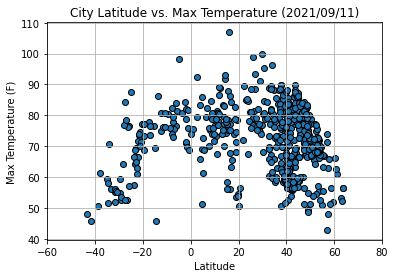

In [10]:
# choose lat and temp column from clean city data
latitude = clean_city_data["Lat"]
temperature = clean_city_data["Max Temp"]
# convert unix time to normal datetime
date = pd.to_datetime(clean_city_data["Date"].mean(),unit='s').strftime('%Y/%m/%d')
# plot the scatter graph
plt.scatter(latitude, temperature, edgecolor='black')
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,80)
plt.savefig("../output_data/Latitude_vs_Temperature_Plot.png")
plt.show()

## Latitude vs. Humidity Plot

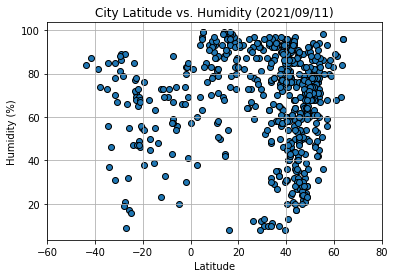

In [11]:
# choose lat and humidity column from clean city data
latitude = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
date = pd.to_datetime(clean_city_data["Date"].mean(),unit='s').strftime('%Y/%m/%d')
plt.scatter(latitude, humidity, edgecolor='black')
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60,80)
plt.savefig("../output_data/Latitude_vs_Humidity_Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

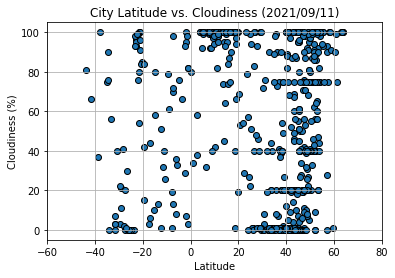

In [12]:
# choose lat and cloudiness column from clean city data
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
date = pd.to_datetime(clean_city_data["Date"].mean(),unit='s').strftime('%Y/%m/%d')
plt.scatter(latitude, cloudiness, edgecolor='black')
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60,80)
plt.savefig("../output_data/Latitude_vs_Cloudiness_Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

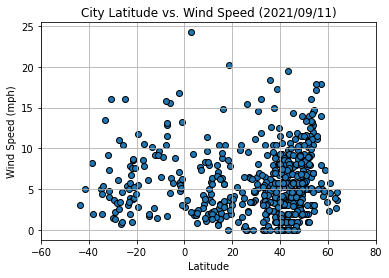

In [13]:
# choose lat and wind speed column from clean city data
latitude = clean_city_data["Lat"]
wind_speed = clean_city_data["Wind Speed"]
date = pd.to_datetime(clean_city_data["Date"].mean(),unit='s').strftime('%Y/%m/%d')
plt.scatter(latitude, wind_speed, edgecolor='black')
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60,80)
plt.savefig("../output_data/Latitude_vs_WindSpeed_Plot.png")
plt.show()

## Linear Regression

#### Northern Hemisphere (greater than or equal to 0 degrees latitude)
#### Southern Hemisphere (less than 0 degrees latitude)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

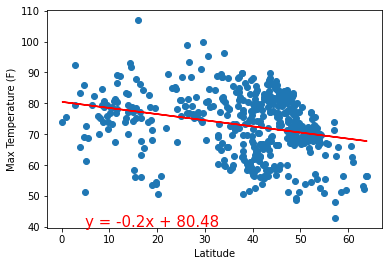

The r-value is: -0.27


In [14]:
north_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
north_latitude = north_data["Lat"]
north_temperature = north_data["Max Temp"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_latitude, north_temperature)
regress_values = north_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(north_latitude, north_temperature)
plt.plot(north_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/North_Latitude_vs_MaxTemp_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Northern Hemisphere's latitude and Max. Temperature is -0.27, there is very weak negative correlation between both factors, this means with increasing of latitude there is weakly or not decreasing of Max. temperature (F).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

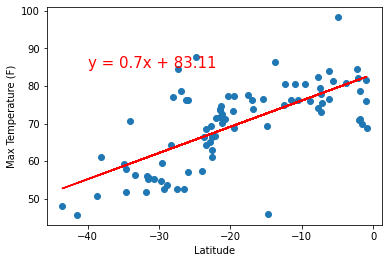

The r-value is: 0.69


In [15]:
south_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
south_latitude = south_data["Lat"]
south_temperature = south_data["Max Temp"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_latitude, south_temperature)
regress_values = south_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(south_latitude, south_temperature)
plt.plot(south_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(-40,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/South_Latitude_vs_MaxTemp_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Southern Hemisphere's latitude and Max. Temperature is 0.69, there is moderate positive correlation between both factors, this means with increasing of latitude there is moderately increasing of Max. temperature (F).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

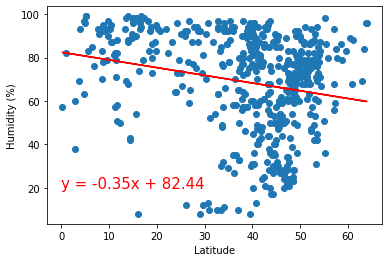

The r-value is: -0.21


In [16]:
north_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
north_latitude = north_data["Lat"]
north_humidity = north_data["Humidity"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_latitude, north_humidity)
regress_values = north_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(north_latitude, north_humidity)
plt.plot(north_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/North_Latitude_vs_Humidity_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Northern Hemisphere's latitude and Humidity is -0.21, there is very weak negative or almost no correlation between both factors, this means humidity (%) is not affected or weakly decreasing by increasing of latitude at northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

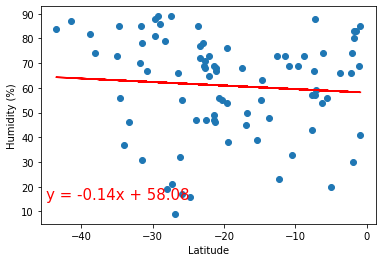

The r-value is: -0.08


In [17]:
south_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
south_latitude = south_data["Lat"]
south_humidity = south_data["Humidity"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_latitude, south_humidity)
regress_values = south_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(-45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/South_Latitude_vs_Humidity_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Southern Hemisphere's latitude and Humidity is -0.08, there is very weak negative or almost no correlation between both factors, this means humidity (%) is not affected by latitude at southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

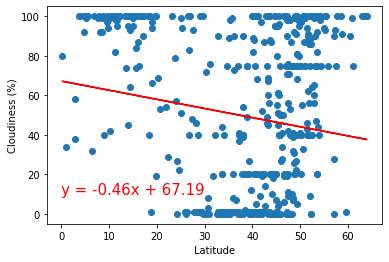

The r-value is: -0.16


In [18]:
north_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
north_latitude = north_data["Lat"]
north_cloudiness = north_data["Cloudiness"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_latitude, north_cloudiness)
regress_values = north_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(north_latitude, north_cloudiness)
plt.plot(north_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/North_Latitude_vs_Cloudiness_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Northern Hemisphere's latitude and Cloudiness is -0.16, there is very weak negative or almost no correlation between both factors, this means cloudiness (%) is not affected by latitude at northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

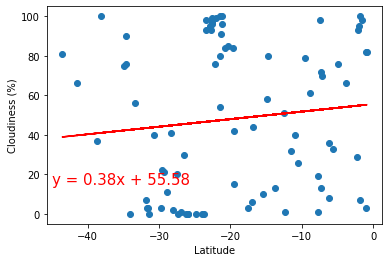

The r-value is: 0.11


In [19]:
south_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
south_latitude = south_data["Lat"]
south_cloudiness = south_data["Cloudiness"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_latitude, south_cloudiness)
regress_values = south_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(south_latitude, south_cloudiness)
plt.plot(south_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(-45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/South_Latitude_vs_Cloudiness_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Southern Hemisphere's latitude and Cloudiness is 0.11, there is very weak positive or almost no correlation between both factors, this means cloudiness (%) is not affected by latitude at southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

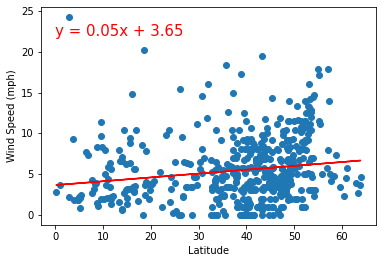

The r-value is: 0.16


In [20]:
north_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
north_latitude = north_data["Lat"]
north_wind_speed = north_data["Wind Speed"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_latitude, north_wind_speed)
regress_values = north_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(north_latitude, north_wind_speed)
plt.plot(north_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(0,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/North_Latitude_vs_WindSpeed_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Northern Hemisphere's latitude and Wind speed is 0.16, there is very weak positive or almost no correlation between both factors, this means wind speed(mph) is not affected by latitude at northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

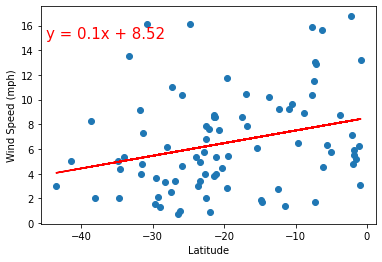

The r-value is: 0.28


In [21]:
south_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
south_latitude = south_data["Lat"]
south_wind_speed = south_data["Wind Speed"]

# find parameters for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_latitude, south_wind_speed)
regress_values = south_latitude * slope + intercept
# get the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter 
plt.scatter(south_latitude, south_wind_speed)
plt.plot(south_latitude,regress_values,"r-")
# plot the linear equation
plt.annotate(line_eq,(-45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/South_Latitude_vs_WindSpeed_Plot.png")
plt.show()

print(f"The r-value is: {round(rvalue,2)}")

### As the r-value between Southern Hemisphere's latitude and Cloudiness is 0.28, there is very weak positive or almost no correlation between both factors, this means wind speed (mph) is not affected or weakly increasing by increasing of latitude at southern hemisphere.